# Prosjekt 2 - Generere tekst med GPT-2

#### Tiril Flatebø, Silje Bentdal, Iris Bore og Kristin Eng

## Introduksjon
GPT-2 er en språkmodell, basert på kunstig intelligens, som tar inn tekststrenger som inndata og gir ut fortsettende tekststrenger som utdata. Modellen er laget av OpenAI i februar 2019 og er trent på korpuset "WebText".

I denne oppgaven skal vi undersøke hvor godt GPT-2 presterer på et spesfikt tema, henholdsvis før og etter trening på tema-relevante datasett. Vi starter med å sette opp GPT-2, før vi tester den på fem forskjellige tekststrenger. Videre velger vi ut den tekststrengen som GPT-2 presterer best på, for så å sammenligne GPT-2 sin tekst med en menneskeskrevet tekst. Vi sammenligner de to tekstene ved å gjøre en "Turingtest". Etter å ha gjennomført testen, trener vi GPT-2 på det temaet den presterte dårligst på. Dette gjør vi ved å laste inn nye, relevante datasett, før vi til slutt gjennomfører samme "Turingtest" på nytt.


In [1]:
#Installering
!pip install aitextgen

#Importeringer
import pandas as pd
import matplotlib.pyplot as plt
from aitextgen import aitextgen
from aitextgen.TokenDataset import TokenDataset

     |████████████████████████████████| 571 kB 864 kB/s 
     |████████████████████████████████| 87 kB 2.2 MB/s 
  Created wheel for aitextgen: filename=aitextgen-0.5.1-py3-none-any.whl size=574891 sha256=e7444d4a5e8aad92890b0b864e25718591196eddaf4c1337fb06ebe7d6208835
  Stored in directory: /root/.cache/pip/wheels/3e/9d/2f/265dcbb1d10e883a33431a34fcf017a061f5354aeb3ba57aaa
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=3fccd32bbb31aa8fde60d3c85a574d03ae377865b0a7797d92b0eb2c527bff32
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built aitextgen fire


## Oppgave 1
I denne oppgaven setter vi opp GPT-2 og tester den på fem forskjellige tekststrenger. Vi diskuterer modellens prestasjon og velger ut tekststrengene GPT-2 presterer henholdsvis best og dårligst på.

### Oppsett av GPT-2

In [2]:
ai = aitextgen(model_name = "gpt-small")

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

### Test av GPT-2

Vdere tester vi modellen på følgende tekststrenger:
- "Trump is president because"
- "Climate change is"
- "The coronavirus is"
- "What is Black Lives Matter?"
- "What is white supremacy?"

Vi ber modellen skrive ut tekster på maks 100 tegn og lagrer utskriftene i egne filer.

In [3]:
#Parametre
seed = 42
temperature = 1.2
max_length = 100

#Lister med tekststrenger og filnavn 
prompt_list = ["Trump is president because", "Climate change is", "What is Black Lives Matter?", "What is white supremacy?", "The coronavirus is"]
file_list = ['Trump.txt', 'Climate_change.txt', 'BLM.txt', 'White_supremacy.txt', 'Corona.txt']

#Genererer
for prompt, file in zip(prompt_list, file_list):
    ai.generate_to_file(n=1, prompt=prompt, max_length=max_length, temperature=temperature, seed=seed,destination_path=file)

#Printer genererte tekster
for text in file_list:
    f = open(text, "r")
    print(f.read()) 

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Trump is president because I believe in fighting the enemy and fighting in his name."

It was a stark contrast to Bannon over the course of his first year in the White House, when the White House told Bannon, "We're happy with how Mike did and everything he's capable of," the same administration officials told him. The White House also said in January that Bannon was prepared to transition more staff from the top two advisers to other White House positions. The decision drew fire from White House allies

Climate change is already making it especially difficult for coastal dwellers.

Climate change will further exacerbate local climate risk in most of the Atlantic, Asia, South East Africa, Middle East, Europe and Australia, with greater risks for the northern and tropical Pacific and the Indian Ocean.

The US's global warming potential has exceeded previously agreed targets by between 7.5°C and 6°C by the end of the century. And those projections are all based on a 20 per cent rise in



### Diskusjon av tekstenes troverdighet
Ingen av de fem tekstene er veldig troverdige; alle har syntaktiske, semantiske og pragmatiske språkfeil. I avgjørelsen av hvilke tekster vi mener er best og dårligst, har vi valgt å vektlegge syntaks. Konklusjonen er derfor at teksten om klimaendring er best, og at teksten om Trump er dårligst. Grunnen til at vi mener teksten om Trump har dårligst syntaks, er at den inneholder ufullstendige setninger og omstokkede ord. 

For oversikts skyld nevner vi at vi like så godt kunne vektlagt semantikk og pragmatikk. I så fall ville nok teksten om "black lives matter"-bevegelsen vært den dårligste, blant annet grunnet setningen "black youth are less likely than other youth to be killed by police". Teksten om klimaendring ville imidlertid fortsatt vært å regne som den beste. Vi observerer altså at GPT-2 presterer både syntaktiske, semantisk og pragmatisk godt på tekster om klimaendring. Dette skyldes sannsynligvis at datasettet som GPT-2 er trent på (default datasettet) inneholder mange og gode tekster om klimaendringer.


## Oppgave 2: Teste modellens troverdighet
I forrige oppgave kom vi fram til at teksten om klimaendring var best. Nå ønsker vi å teste *hvor* god teksten egentlig er. Det gjør vi ved å lage to konkurrerende tekster som også handler om klimaendringer, for så å presentere alle tre tekstene for noen medstudenter som skal gjette hvilken av tekstene som er generert av GPT-2. Vi gjennomfører altså en slags "Turingtest".

Følgende tabell (uten fet skrift) ble sendt til fire medstudenter, og de fikk beskjed om å krysse av for hvilken av tekstene de trodde var generert.


| Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | Generated? |   |   |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|---|---|
| **Climate change is already making it especially difficult for coastal dwellers.  Climate change will further exacerbate local climate risk in most of the Atlantic, Asia, South East Africa, Middle East, Europe and Australia, with greater risks for the northern and tropical Pacific and the Indian Ocean.  The US's global warming potential has exceeded previously agreed targets by between 7.5°C and 6°C by the end of the century.**                                                                                                                                                                                                          |            |   |   |
| Climate change is the crisis of our time. It contributes to difficulties for the ecosystem by warming the earth faster than it can handle.   If we do not decrease the speed which temperature rises, it will be a catastrophe for the Arctic. Sea levels rise at a high speed which will accumulate the effect. To slow down the temperature rise, humans need to take responsibility for their actions.   Though climate change is affected by human activity, it is also a natural process. Change in climate happened before the industrial revolution by for example volcanic eruptions.                                                        |            |   |   |
| Climate change is one of the most pressing problems for modern civilizations. With temperatures increasing and sea levels rising several communities are watching their homeland being turned unlivable.   In spite of the urgency of climate change there is a lack of will amongst politicians worldwide to act. An example of this is how the former president of the United States pulled out of the Paris agreement early in his presidency.   If something is not done to combat climate change the consequences for future generations will be severe. Mass extinction, frequent natural disasters and pollution will dominate life on Earth. |            |   |   |
|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |            |   |   |


Resultatet ble som følger:

Text(0, 0.5, 'Antall personer')

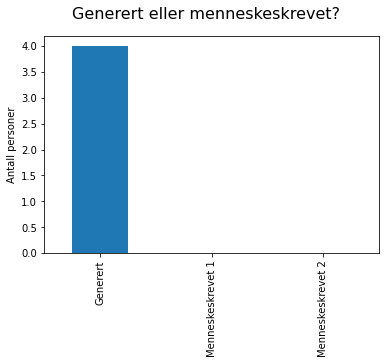

In [4]:
#Lager dataframe med informasjon
data = {'Generert':[1, 1, 1, 1], 'Menneskeskrevet 1':[0, 0, 0, 0], 'Menneskeskrevet 2': [0, 0, 0, 0]}  
df = pd.DataFrame(data, index =['student1', 'student2', 'student3', 'student4']) 

#Lager histogram
fig = plt.figure()
df.sum(axis=0).plot(kind='bar')
fig.suptitle('Generert eller menneskeskrevet?', fontsize=16)
fig.gca().set_ylabel('Antall personer')

Her kan vi tydelig se at GPT-2 ikke bestod "Turingtesten". Alle medstudentene gjettet riktig på hvilken av teksten som var generert. Det bør likevel nevnes at noen av medstudentene misforsto oppgaven og gjettet at flere av tekstene var generert av GPT-2. Da de ble informert om at kun én av tekstene var generert, landet imidlertid alle studentene på "riktig" tekst.

## Oppgave 3: Finjustering av modellen
I den første oppgaven kom vi også fram til at den dårligste teksten, var teksten om Trump. Så i denne oppgaven vil vi trene GPT-2 til å bli bedre på tekster om Trump. Dette gjør vi ved å laste inn datasett om temaer knyttet til Trump, for så å trene GPT-2 på datasettene. Vi laster inn og trener på følgende datasett:

- 2016 US Presidential Primary Debates (last updated in 2016)
- New York Times Articles 1920-2020 (last updated november 2020)
  - 2016
  - 2017
  - 2018
  - 2019
  - 2020
- Trump Impeachment Polls (last updated in 2020)


In [5]:
#Leser inn datasettene og samler dem i lista "full_list"
df_primary_debates = pd.read_csv("../input/2016-us-presidential-primary-debates/primary_debates_cleaned.csv")
primary_debates_list = list(df_primary_debates[df_primary_debates.Text == df_primary_debates.Text].Text)

df_impeachment= pd.read_csv("../input/trump-impeachment-polls/impeachment-polls.csv")
impeachment_list = list(df_impeachment[df_impeachment.Text == df_impeachment.Text].Text)

full_list = primary_debates_list + impeachment_list #legger til tekster i full_list

articles = ["../input/nyt-articles-data/df_2016.csv",
            "../input/nyt-articles-data/df_2017.csv",
            "../input/nyt-articles-data/df_2018.csv",
            "../input/nyt-articles-data/df_2019.csv",
            "../input/nyt-articles-data/df_2020.csv"
           ]
for article in articles:
    df = pd.read_csv(article)
    article_list = list(df[df.sentence == df.sentence].sentence)
    full_list += article_list                       #legger til flere tekster i full_list

    
#Lager et treningssett av "full_list"
training_data = TokenDataset(texts=full_list)

#Trener GPT-2 på treningssettet
ai.train(training_data,
         line_by_line=True,
        from_cache=False,
        num_steps=100,
        generate_every=10,
        learning_rate=1e-4,
        fp16=False,
        batch_size=1)



  0%|          | 0/411079 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

10 steps reached: generating sample texts.
A lot of people have asked about the benefits of having a father. It turns out that mothers and fathers are more likely to have children, and that fathers aren't the only factor in the success of a family.
20 steps reached: generating sample texts.
The government is stepping up its efforts to prevent a potential strike by workers. The government recently ordered some businesses to shut down when an automated system was used to order a workers' home in August. An election in Georgia is looming. A third-party candidates are up in the air. A Trump win in Georgia and Alabama has been the best-case scenario in the country. Trump wins in Florida and Alabama. Trump wins in West Virginia and Virginia. Trump wins in Ohio and Virginia. Trump wins in Georgia and Alabama. Trump wins in West Virginia and Florida. Trump wins in Georgia and Alabama. Trump wins in West Virginia and Mississippi. Trump wins in Florida and Mississippi. Trump wins in Florida and 

## Oppgave 4: Teste virkningen av finjusteringen

I denne siste oppgaven vil vi gjennomføre en ny "Turingtest". Nå ønsker vi å se om GPT-2 har blitt så god på tekster om Trump at de fire medstudentene ikke klarer å skille hvilken av tre tekster, som er skrevet av GPT-2. Vi generer fem tekster om Trump og velger ut den beste.




In [6]:
ai.generate_to_file(n=5, prompt="Trump is president because", max_length=100, temperature=1.2, seed=42, destination_path = "Trump2.txt")

f2 = open("Trump2.txt", "r")
print(f2.read())

  0%|          | 0/5 [00:00<?, ?it/s]

Trump is president because I believe in fighting the scourge of corruption in the halls of power. If you want to cut that bill, cut it yourself, do it yourself. No. 1: Your administration and our country don't need one another anymore. No. 2: We are all fighting with the same tools. What's the issue? Where is money fighting? Where is political spending? We are all fighting in this fight, and we're all using the same tool. How else does the White
Trump is president because we stand together – we trust our military to defend our country. We are defending our nation, we stand alongside our ally India. But there cannot be peace in this country. “All right?” When” Israel Is Dead, You Will Forget It’s Still Alive
Trump is president because he is a Democrat. Trump Is Trump’s Republican. Will Trump Vote for Democrat?
Trump is president because of “of us” a lot. He’s the only sane person Trump can’t get on TV shows. A New York Politics Guy With Only a Nervous Mind?
Trump is president because th

Videre sendte vi følgende tabell (uten fet skrift) til de fire medstudentene og ba dem om å krysse av for hvilken tekst de mente var generert av GPT-2. Den uthevede teksten er den beste av tekstene GPT-2 genererte etter treningen (se over).


| Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | Generated? |   |   |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|---|---|
| **Trump is president because he has found another way: creating a new social-media empire. That empire: the White House.**                                                                                                                                                                                                          |            |   |   |
| Trump is president because he knows how to engage the public. He is well trained in getting the media's attention; "all press, is good press".                                                       |            |   |   |
| Trump is president because the people voted for him. He said that he fights for real people: with him as president, the economy would be better.  |            |   |   |
|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |            |   |   |

Resultatet av den andre "Turingtesten" ble som følger:

Text(0, 0.5, 'Antall personer')

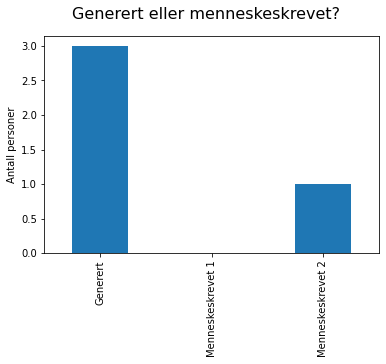

In [7]:
#Lager dataframe med informasjon
data = {'Generert':[1, 1, 1, 0], 'Menneskeskrevet 1':[0, 0, 0, 0], 'Menneskeskrevet 2': [0, 0, 0, 1]}  
df = pd.DataFrame(data, index =['student1', 'student2', 'student3', 'student4']) 

#Lager histogram
fig = plt.figure()
df.sum(axis=0).plot(kind='bar')
fig.suptitle('Generert eller menneskeskrevet?', fontsize=16)
fig.gca().set_ylabel('Antall personer')

Konklusjonen er at GPT-2 ikke er særlig god til å lage tekster om Trump, om enn noe bedre etter treningen enn før treningen. 

Vi ser også at GPT-2 presterte litt bedre på temaet "Trump" enn på temaet "klimaendring". Dette kan imidlertid bare være flaks; det kan være tilfeldig at GPT-2 genererte én bra tekst om Trump og én mindre bra tekst om klimaendring. For å sammenligne to temaer må vi sammenligne langt flere tekster enn én. En annen ting som kan nevnes, er at tekstutsnittet om Trump (etter trening) er langt kortere enn tekstutsnittet om klimaendringer, hvilket gir GPT-2 flere setninger "å avsløre seg på". Hvorfor tekstutsnittene om Trump er kortere enn tekstutsnittene om klimaendring når makslengden er satt til å være det samme, er vi ikke sikre på. Men det kan skyldes at setningene om Trump er trent på avisartikler og taler, som jo ofte inneholder korte setninger. 

## Kilder

Unknown."GPT-2". *Wikipedia* 27.04.21 https://en.wikipedia.org/wiki/GPT-2#Generative_Pre-trained_Transformer

Radford, Alec, Jeffrey Wu, Dario Amodei, Daniela Amodei, Jack Clark, Miles Brundage, Ilya Sutskever. "Better Language Models and Their Implications" *OpenAI* 14.02.19 https://openai.com/blog/better-language-models/#sample8
